In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Loading the Dataset

In [6]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 testing images

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test=y_test.reshape(-1,)

In [12]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

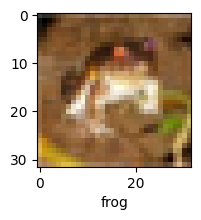

In [14]:
plot_sample(X_train,y_train,0)

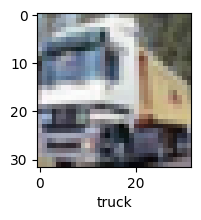

In [15]:
plot_sample(X_train,y_train,1)

Normalizing the training data

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

#CNN Model Building

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3750 - loss: 1.7070
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 46ms/step - accuracy: 0.5913 - loss: 1.1644
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6517 - loss: 1.0045
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.6838 - loss: 0.9149
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - accuracy: 0.7048 - loss: 0.8568
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7244 - loss: 0.8019
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7384 - loss: 0.7561
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7532 - loss: 0.7150
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7665 - loss: 0.6745
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7776 - loss: 0.6435


Observation- It has been observed that by applying CNN model. It is gives accuracy 76%

In [23]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7004 - loss: 0.9204


[0.9344407320022583, 0.6963000297546387]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.3788549e-03, 2.2306794e-04, 9.6111489e-04, 6.9868410e-01,
        2.0485450e-04, 1.8674460e-01, 1.2301027e-02, 2.3523378e-04,
        9.8179854e-02, 1.0872972e-03],
       [1.8809622e-02, 2.4335759e-03, 2.6842923e-04, 5.2955975e-06,
        6.4976266e-06, 1.2571429e-06, 7.1630220e-06, 5.3480449e-06,
        9.7785568e-01, 6.0717762e-04],
       [9.9470153e-02, 4.7103055e-02, 1.6743422e-02, 4.4737319e-03,
        9.1222832e-03, 2.5109760e-03, 1.4268324e-03, 9.4478950e-03,
        8.0079091e-01, 8.9107491e-03],
       [5.9764963e-01, 4.0605888e-02, 2.0686705e-01, 1.4365672e-02,
        6.1032914e-02, 1.2674899e-04, 2.2446138e-03, 2.4970546e-03,
        7.3725030e-02, 8.8535401e-04],
       [2.0795504e-07, 1.6168664e-06, 1.1461924e-02, 1.2360222e-02,
        9.6097454e-02, 1.0623925e-04, 8.7997019e-01, 1.1766623e-06,
        9.2412517e-07, 6.4661336e-08]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

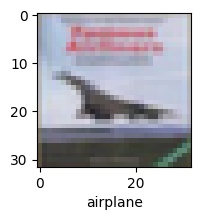

In [27]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'